# MSDS 455 Assignment 3 Hierarchical & Part-to-Whole Data

Data Source: https://databank.worldbank.org/source/world-development-indicators

## EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./CO2_emissions_by_country_kt.csv')

In [3]:
df

,Country Name,Country Code,Series Name,Series Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],...,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021]
0,Afghanistan,AFG,CO2 emissions (kt),EN.ATM.CO2E.KT,760,730,1029.99997138977,1220.00002861023,1029.99997138977,1549.99995231628,...,8079.99992370605,5989.99977111816,4880.00011444092,5949.99980926514,5300.00019073486,4780.00020980835,6070.00017166138,6079.99992370605,..,..
1,Albania,ALB,CO2 emissions (kt),EN.ATM.CO2E.KT,3170,3230,3759.99999046326,4070.00017166138,4250,4030.00020980835,...,4360.0001335144,4440.00005722046,4820.00017166138,4619.99988555908,4480.00001907349,5139.9998664856,5110.0001335144,4829.99992370605,..,..
2,Algeria,DZA,CO2 emissions (kt),EN.ATM.CO2E.KT,80050,78650,82400.0015258789,88190.0024414063,89489.9978637695,94190.0024414063,...,134929.992675781,139020.004272461,147740.005493164,156270.004272461,154910.003662109,158339.996337891,165539.993286133,171250,..,..
3,American Samoa,ASM,CO2 emissions (kt),EN.ATM.CO2E.KT,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
4,Andorra,AND,CO2 emissions (kt),EN.ATM.CO2E.KT,520,520,529.999971389771,529.999971389771,560.000002384186,579.999983310699,...,490.000009536743,479.999989271164,460.00000834465,469.999998807907,469.999998807907,469.999998807907,490.000009536743,500,..,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
220,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# checking number of countries
df['Country Name'].nunique()

219

In [5]:
# checking for most recent year with data
df['2021 [YR2021]'].nunique()

1

In [6]:
# checking for most recent year with data
df['2020 [YR2020]'].nunique()

1

In [7]:
# checking for most recent year with data
df['2019 [YR2019]'].nunique()

187

### Data Cleaning

In [8]:
# create year column and value column
df = df.melt(id_vars=['Country Name', 'Country Code', 'Series Name', 'Series Code'],
         var_name="Year", 
        value_name="Value")

In [9]:
df.head()

,Country Name,Country Code,Series Name,Series Code,Year,Value
0,Afghanistan,AFG,CO2 emissions (kt),EN.ATM.CO2E.KT,2000 [YR2000],760
1,Albania,ALB,CO2 emissions (kt),EN.ATM.CO2E.KT,2000 [YR2000],3170
2,Algeria,DZA,CO2 emissions (kt),EN.ATM.CO2E.KT,2000 [YR2000],80050
3,American Samoa,ASM,CO2 emissions (kt),EN.ATM.CO2E.KT,2000 [YR2000],..
4,Andorra,AND,CO2 emissions (kt),EN.ATM.CO2E.KT,2000 [YR2000],520


In [10]:
# clean year field
df['Year']=df['Year'].str[:4].astype(int)

In [11]:
# convert missing values to NaN
df['Value'] = df['Value'].apply(pd.to_numeric, errors='coerce')

In [12]:
# drop NaN values
df = df.dropna()

In [13]:
df

,Country Name,Country Code,Series Name,Series Code,Year,Value
0,Afghanistan,AFG,CO2 emissions (kt),EN.ATM.CO2E.KT,2000,760.000000
1,Albania,ALB,CO2 emissions (kt),EN.ATM.CO2E.KT,2000,3170.000000
2,Algeria,DZA,CO2 emissions (kt),EN.ATM.CO2E.KT,2000,80050.000000
4,Andorra,AND,CO2 emissions (kt),EN.ATM.CO2E.KT,2000,520.000000
5,Angola,AGO,CO2 emissions (kt),EN.ATM.CO2E.KT,2000,16200.000000
...,...,...,...,...,...,...
4428,"Venezuela, RB",VEN,CO2 emissions (kt),EN.ATM.CO2E.KT,2019,112339.996338
4429,Vietnam,VNM,CO2 emissions (kt),EN.ATM.CO2E.KT,2019,336489.990234
4432,"Yemen, Rep.",YEM,CO2 emissions (kt),EN.ATM.CO2E.KT,2019,11100.000381
4433,Zambia,ZMB,CO2 emissions (kt),EN.ATM.CO2E.KT,2019,6800.000191


In [14]:
# check remaining # of countries
df['Country Name'].nunique()

191

In [15]:
# drop 2021 and 2020 since there is no data for those years
df = df[(df['Year'] != 2020) | (df['Year'] != 2021)]

In [16]:
# check years in df
df['Year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [17]:
# aggregate and group by country
df2 = df.groupby(['Country Name','Country Code'], as_index=False).Value.agg('sum')

In [18]:
df2

,Country Name,Country Code,Value
0,Afghanistan,AFG,8.146000e+04
1,Albania,ALB,8.606000e+04
2,Algeria,DZA,2.398420e+06
3,Andorra,AND,1.023000e+04
4,Angola,AGO,4.337900e+05
...,...,...,...
186,"Venezuela, RB",VEN,2.988880e+06
187,Vietnam,VNM,2.977620e+06
188,"Yemen, Rep.",YEM,3.824900e+05
189,Zambia,ZMB,7.118000e+04


In [19]:
# sort descending order
df2.sort_values(['Value'], axis=0, ascending=False, inplace=True)

In [20]:
# add percent of total column
df2['percent'] = (df2['Value'] / df['Value'].sum()) * 100

In [21]:
# add cumulative sum column
df2['cumsum'] = df2['percent'].cumsum()

In [22]:
# select top 60%
df3 = df2[df2['cumsum'] <= 60]

In [23]:
df3

,Country Name,Country Code,Value,percent,cumsum
35,China,CHN,1.527328e+08,25.926587,25.926587
182,United States,USA,1.065908e+08,18.093913,44.020500
76,India,IND,3.267958e+07,5.547398,49.567898
141,Russian Federation,RUS,3.239472e+07,5.499043,55.066941
84,Japan,JPN,2.367469e+07,4.018807,59.085749


In [24]:
# drop columns not needed for donut chart
df3 = df3.drop(['Country Code', 'Value', 'cumsum'], axis=1)

In [25]:
# create list of top 60 pct countries
top60_pct = df3['Country Name'].tolist()

In [26]:
top60_pct

['China', 'United States', 'India', 'Russian Federation', 'Japan']

In [27]:
# calculate rest of world percentage
row_pct = df2.loc[~df2['Country Name'].isin(top60_pct), 'percent'].sum()

In [28]:
row_pct

40.91425121198883

In [29]:
# add rest of world percent to data frame with top 60 pct
row = {'Country Name': 'Rest of World', 'percent': row_pct}

df4 = df3.append(row, ignore_index = True)

In [30]:
df4

,Country Name,percent
0,China,25.926587
1,United States,18.093913
2,India,5.547398
3,Russian Federation,5.499043
4,Japan,4.018807
5,Rest of World,40.914251


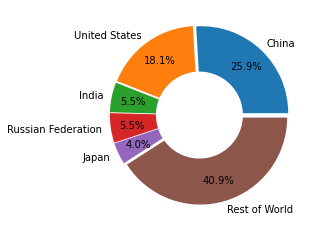

In [31]:
# explosion
explode = (0.03, 0.03, 0.03, 0.03, 0.03, 0.03)
  
# Pie Chart
plt.pie(df4['percent'], labels=df4['Country Name'],
        autopct='%1.1f%%', pctdistance=0.75, explode=explode)
  
# draw circle
center_circle = plt.Circle((0, 0), 0.5, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(center_circle)

# save image
plt.gcf()
plt.savefig('CO2_emissions.png')
  
# Displaying Chart
plt.show()